In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [60]:
# provide path where images are saved
path1 = 'image3.jpg'
path2 = 'image1.jpg'
N = 512

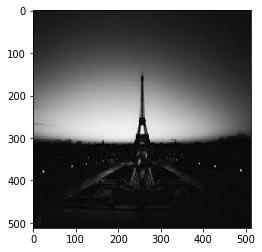

In [61]:
img1 = cv2.imread(path1)
img1 = cv2.resize(img1, (N, N))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap='gray')

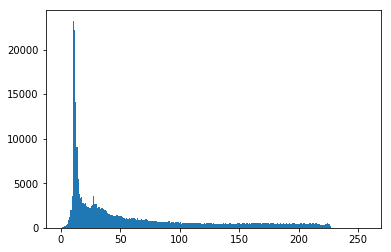

In [62]:
plt.hist(img1.ravel(),256,[0,256])
plt.show()

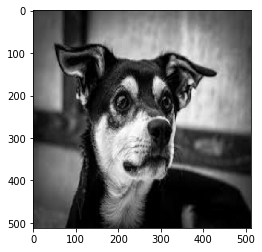

In [63]:
img2 = cv2.imread(path2)
img2 = cv2.resize(img2, (N, N))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap='gray')

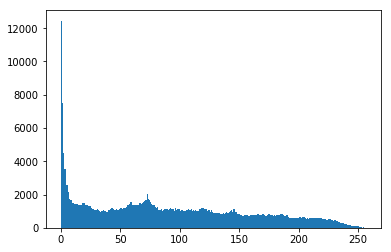

In [64]:
plt.hist(img2.ravel(),256,[0,256])
plt.show()

In [65]:
img1.shape

(512, 512)

Encryption-

In [99]:
a = 5
b = 7
itr = 40
mu = 900
gamma = 400

In [100]:
def cat_transform(img, N, a, b):
    tx_img = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            tx_img[i][j] = img[(i+a*j)%N][(b*i+(a*b+1)*j)%N]
    return tx_img

In [101]:
def cat_tx_iter(img, itr, a, b):
    for i in range(itr):
        tx_img = cat_transform(img, N, a, b)
        img = tx_img
    return tx_img

In [102]:
scrambled_img = cat_tx_iter(img1, itr, a, b)

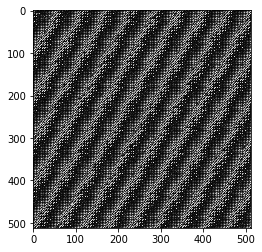

In [103]:
plt.imshow(scrambled_img, cmap='gray')

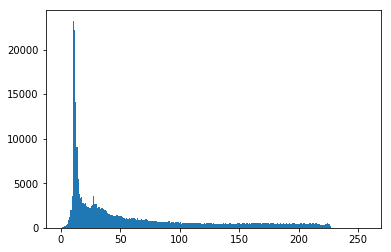

In [104]:
plt.hist(scrambled_img.ravel(),256,[0,256])
plt.show()

In [105]:
g1 = mu - scrambled_img
g2 = mu - img2

In [106]:
def plip_add(g1, g2, N, gamma):
    encrypt_img = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            encrypt_img[i][j] = g1[i][j] + g2[i][j] - (g1[i][j]*g2[i][j])//gamma
    return encrypt_img

In [107]:
encrypt_img = plip_add(g1, g2, N, gamma)

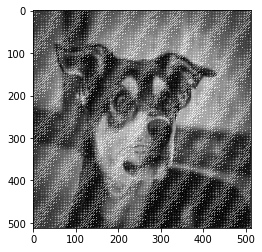

In [108]:
plt.imshow(encrypt_img, cmap='gray')

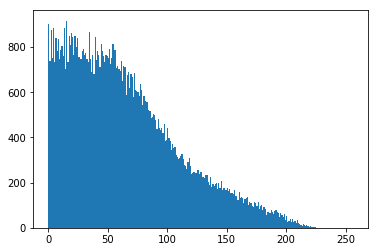

In [109]:
plt.hist(encrypt_img.ravel(),256,[0,256])
plt.show()

Decryption-

In [110]:
k = gamma
mu = 900
a = 5
b = 7
itr = 40

In [111]:
def plip_sub(g1, g2, N, k):
    decrypt_img = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            decrypt_img[i][j] = k*(g1[i][j]-g2[i][j])//(k-g2[i][j])
    return decrypt_img

In [112]:
decrypt_img = plip_sub(encrypt_img, g2, N, k)

In [113]:
obtained_scrambled_img = mu - decrypt_img

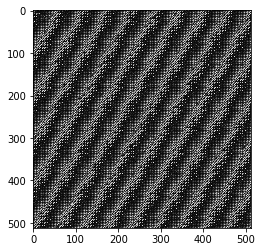

In [114]:
plt.imshow(obtained_scrambled_img, cmap='gray')

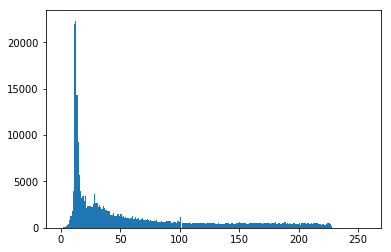

In [115]:
plt.hist(obtained_scrambled_img.ravel(),256,[0,256])
plt.show()

In [116]:
def inv_cat_transform(img, N, a, b):
    inv_tx_img = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            inv_tx_img[(i+a*j)%N][(b*i+(a*b+1)*j)%N] = img[i][j]
    return inv_tx_img

In [117]:
def inv_cat_tx_iter(img, itr, a, b):
    for i in range(itr):
        tx_img = inv_cat_transform(img, N, a, b)
        img = tx_img
    return tx_img

In [118]:
final = inv_cat_tx_iter(obtained_scrambled_img, itr, a, b)

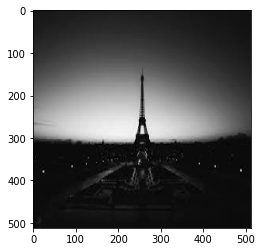

In [119]:
plt.imshow(final, cmap='gray')

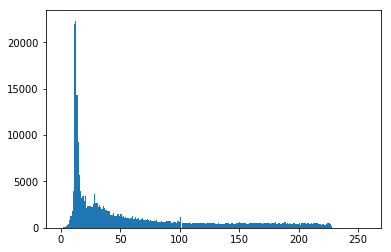

In [120]:
plt.hist(final.ravel(),256,[0,256])
plt.show()